In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Zomato-data-.csv')

In [3]:
df.shape

(148, 7)

In [4]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,148.0,264.810811,653.676951,0.0,6.75,43.5,221.75,4884.0
approx_cost(for two people),148.0,418.243243,223.085098,100.0,200.00,400.0,600.00,950.0


In [8]:
df[['approx_cost(for two people)','votes']]

,approx_cost(for two people),votes
0,800,775
1,800,787
2,800,918
3,300,88
4,600,166
...,...,...
143,100,0
144,150,0
145,450,771
146,800,98


In [9]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [10]:
df[['online_order', 'book_table']]

,online_order,book_table
0,1,1
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
143,0,0
144,0,0
145,1,0
146,0,0


In [11]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    int64 
 2   book_table                   148 non-null    int64 
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(4), object(3)
memory usage: 8.2+ KB


### Univariate Analysis

In [13]:
top_names = df['name'].value_counts().head(10)

C:\Users\Radheshyam\AppData\Local\Temp\ipykernel_15708\991112403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_names.index, y=top_names.values, palette='Reds',)


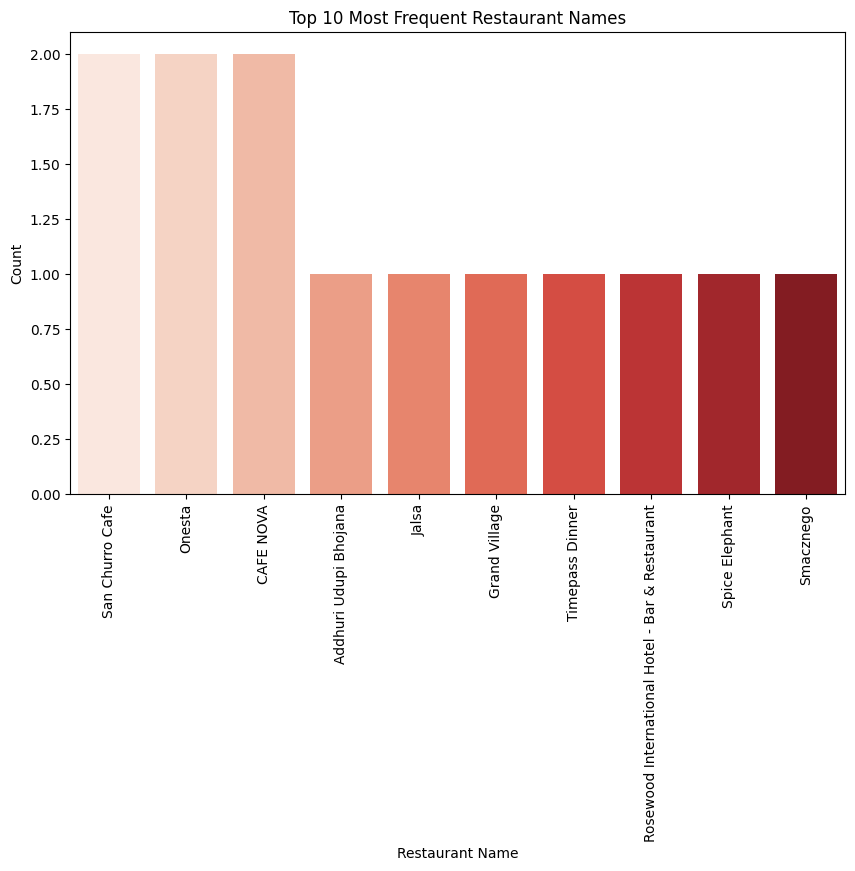

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_names.index, y=top_names.values, palette='Reds',)
plt.title('Top 10 Most Frequent Restaurant Names')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

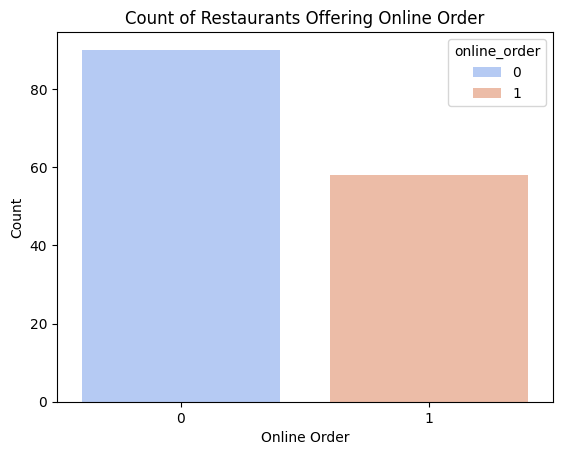

In [15]:
sns.countplot(x='online_order', data=df,hue='online_order', palette='coolwarm')
plt.title('Count of Restaurants Offering Online Order')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

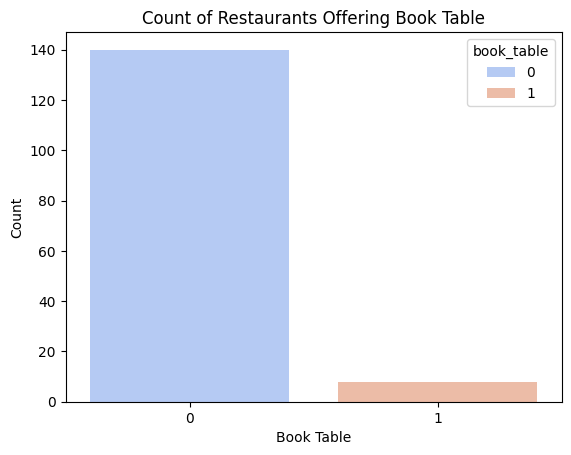

In [16]:
sns.countplot(x='book_table', data=df,hue='book_table', palette='coolwarm')
plt.title('Count of Restaurants Offering Book Table')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

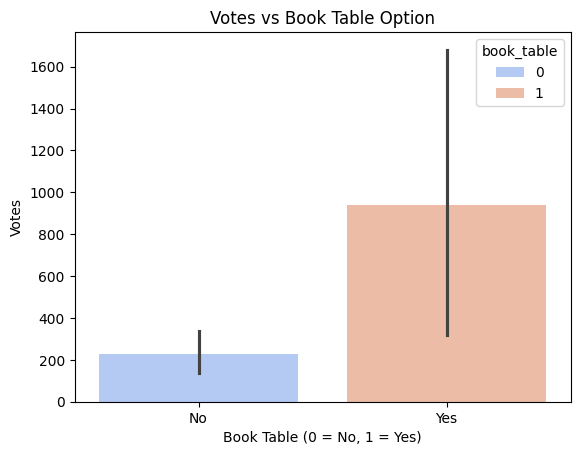

In [17]:
sns.barplot(x='book_table', y='votes', data=df,hue = 'book_table', palette='coolwarm')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Votes vs Book Table Option')
plt.xlabel('Book Table (0 = No, 1 = Yes)')
plt.ylabel('Votes')
plt.show()

Text(0.5, 1.0, 'Votes vs Approx Cost for Two People')

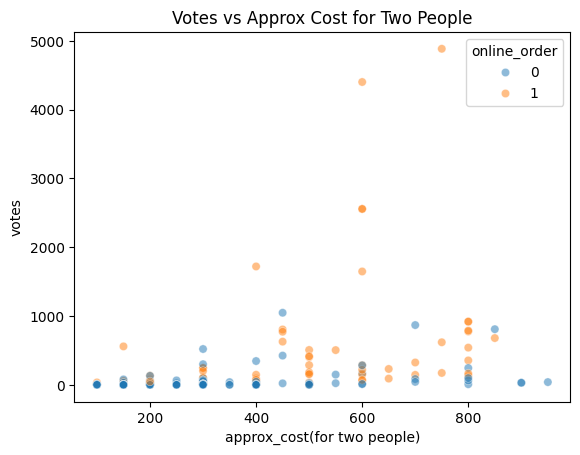

In [18]:
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df, alpha=0.5,hue='online_order')
plt.title('Votes vs Approx Cost for Two People')

### Multivariate Analysis

In [19]:
num_df = df.select_dtypes(include=['int64', 'float64'])

In [20]:
corr = num_df.corr()

In [21]:
corr_matrix = num_df.corr()
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Features')

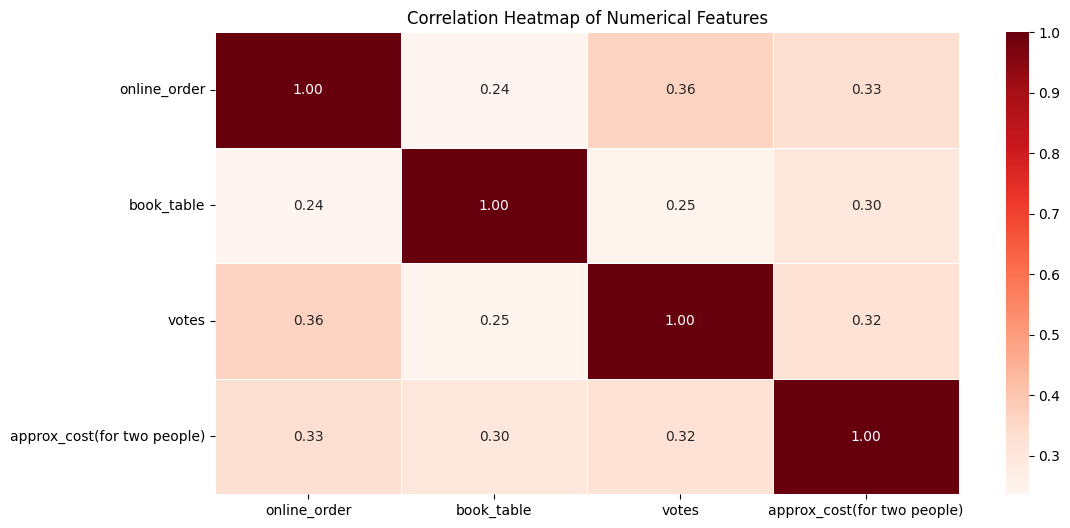

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Reds', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')